# Visualize LDSDA pathways

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

visualize_dsda function is part of the dsda_functions.py module. It is used to visualize the LDSDA pathways. The function takes as input the LDSDA pathways and the name of the output file. The output file is a pdf file that contains the LDSDA pathways.

In [7]:
def visualize_dsda(
    route: list = [],
    k_values: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    k: str = '?',
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    X1, X2 = feas_x, feas_y
    cm = plt.colormaps.get_cmap('viridis_r')
    sc = plt.scatter(X1, X2, s=80, c=objs, cmap=cm)

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    def drawArrow(A, B):
        plt.arrow(
            A[0],
            A[1],
            B[0] - A[0],
            B[1] - A[1],
            width=0.00005,
            head_width=0.15,
            head_length=0.08,
            color='black',
            shape='full',
        )

    for i in range(len(route) - 1):
        drawArrow(route[i], route[i + 1])
    
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)
    plt.title('LDSDA for the Distillation Column with 17 potential trays')
    plt.xlabel(ext1_name)
    plt.ylabel(ext2_name)
    plt.legend(['Route', 'Invalid', 'Evaluated Infeasible'])
    plt.show()

Read the data from the file. Using Pandas, we read the data from the file and store it in a dataframe. The dataframe contains the the complete enumerations of the LDSDA lattice.

In [8]:
df = pd.read_csv('compl_enum_column_17_baron.csv')
# df = pd.read_csv('compl_enum_column_17_knitro.csv')

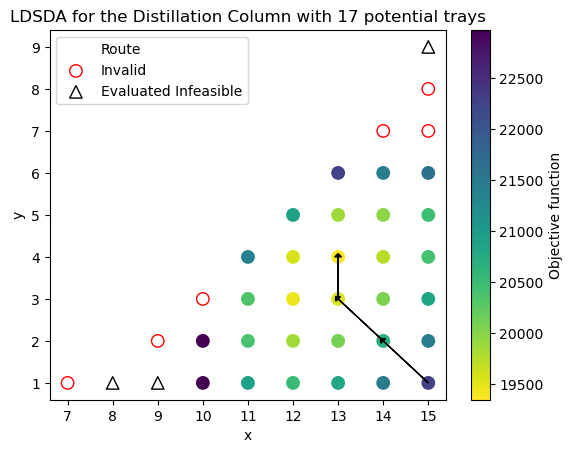

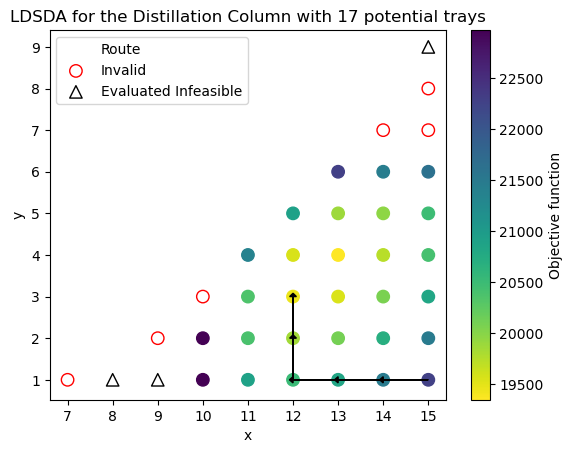

In [9]:
# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# For the route, I am assuming you want to traverse optimal points in order they appear in the CSV
route1 = [(15, 1), (14, 2), (13, 3), (13, 4)]
route2 = [(15, 1), (14, 1), (13, 1), (12, 1), (12, 2), (12, 3)]

# Visualize using the provided function
visualize_dsda(route=route1, feas_x=feas_x, feas_y=feas_y, infeas_x = infeas_x, infeas_y = infeas_y, nan_x = nan_x, nan_y = nan_y, objs=objs, k='Infinity', ext1_name='x', ext2_name='y')
visualize_dsda(route=route2, feas_x=feas_x, feas_y=feas_y, infeas_x = infeas_x, infeas_y = infeas_y, nan_x = nan_x, nan_y = nan_y, objs=objs, k='2', ext1_name='x', ext2_name='y')

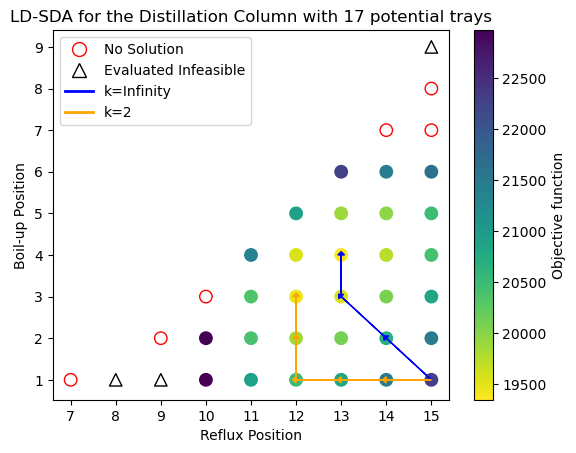

In [14]:
def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    cm = plt.colormaps.get_cmap('viridis_r')

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    sc = plt.scatter(feas_x, feas_y, s=80, c=objs, cmap=cm)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)

    for route, color in routes_colors:
        for i in range(len(route) - 1):
            plt.arrow(
                route[i][0],
                route[i][1],
                route[i + 1][0] - route[i][0],
                route[i + 1][1] - route[i][1],
                width=0.00005,
                head_width=0.15,
                head_length=0.08,
                color=color,
            )

    plt.title('LD-SDA for the Distillation Column with 17 potential trays')
    plt.xlabel(ext1_name)
    plt.ylabel(ext2_name)
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='red', markerfacecolor='white', markersize=10, label='No Solution', linestyle='None'),
        plt.Line2D([0], [0], marker='^', color='black', markerfacecolor='white', markersize=10, label='Evaluated Infeasible', linestyle='None'),
        plt.Line2D([0], [0], color='blue', lw=2, label='k=Infinity'),
        plt.Line2D([0], [0], color='orange', lw=2, label='k=2')
    ]
    plt.legend(handles=legend_elements)
    plt.show()

df = pd.read_csv('compl_enum_column_17_baron.csv')

# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# For the route, I am assuming you want to traverse optimal points in order they appear in the CSV
route1 = [(15, 1), (14, 2), (13, 3), (13, 4)]
route2 = [(15, 1), (14, 1), (13, 1), (12, 1), (12, 2), (12, 3)]

# Visualize both routes on the same graph
routes_colors = [(route1, 'blue'), (route2, 'orange')]
# routes_colors = [(route1, 'blue')]
# routes_colors = [(route2, 'orange')]
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, infeas_x=infeas_x, infeas_y=infeas_y, nan_x=nan_x, nan_y=nan_y, objs=objs, ext1_name='Reflux Position', ext2_name='Boil-up Position')

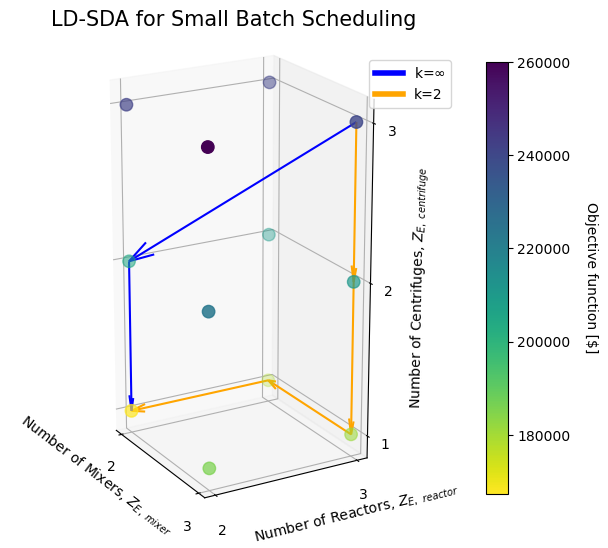

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.ticker import MaxNLocator

def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    feas_z: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
    ext3_name: str = 'External variable 3',
):
    fig = plt.figure(figsize=(8, 18))  # Adjust the figure size here
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((1, 1, 2))

    X1, X2, X3 = feas_x, feas_y, feas_z
    cm = plt.get_cmap('viridis_r')
    sc = ax.scatter(X1, X2, X3, s=80, c=objs, cmap=cm)

    def drawArrow(A, B, color):
        ax.quiver(
            A[0], A[1], A[2],
            B[0] - A[0], B[1] - A[1], B[2] - A[2],
            arrow_length_ratio=0.1,
            color=color
        )

    for route_color in routes_colors:
        route, color = route_color
        for i in range(len(route) - 1):
            drawArrow(route[i], route[i + 1], color)

    custom_lines = [plt.Line2D([0], [0], color='blue', lw=4),
                    plt.Line2D([0], [0], color='orange', lw=4)]
    ax.legend(custom_lines, ['k=$\infty$', 'k=2'])

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.zaxis.set_major_locator(MaxNLocator(integer=True))

    cbar = plt.colorbar(sc, pad=0.05, shrink=0.3)  # Adjusted color bar size
    cbar.set_label('Objective function [$]', rotation=270, labelpad=20)

    # Adjust label positions to avoid overlap
    ax.set_title('LD-SDA for Small Batch Scheduling', fontsize=15, pad=20)  # Adjusted title position
    ax.set_xlabel(ext1_name.replace('Z_E, mixer', '$Z_{E,\\ mixer}$'), labelpad=-1)
    ax.set_ylabel(ext2_name.replace('Z_E, reactor', '$Z_{E,\\ reactor}$'), labelpad=-1)
    ax.set_zlabel(ext3_name.replace('Z_E, centrifuge', '$Z_{E,\\ centrifuge}$'), labelpad=10)

    # Optionally adjust the view angle if necessary
    ax.view_init(elev=20, azim=-30)  # Adjust the elevation and azimuth for a better view
    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)  # Adjusted subplot padding for better layout

    plt.show()

# Example usage with two routes
route3 = [(3,3,3), (2,2,2), (2,2,1)]
route4 = [(3,3,3), (3,3,2), (3,3,1), (2,3,1), (2,2,1)]
routes_colors = [(route3, 'blue'), (route4, 'orange')]

df = pd.read_csv('compl_enum_small_batch_baron.csv')

# Extract x, y, z coordinates and objective values
feas_x = df['x'].tolist()
feas_y = df['y'].tolist()
feas_z = df['z'].tolist()
objs = df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Visualize with multiple routes
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, feas_z=feas_z, objs=objs, ext1_name='Number of Mixers, Z_E, mixer                          ', ext2_name='                           Number of Reactors, Z_E, reactor', ext3_name='Number of Centrifuges, Z_E, centrifuge')


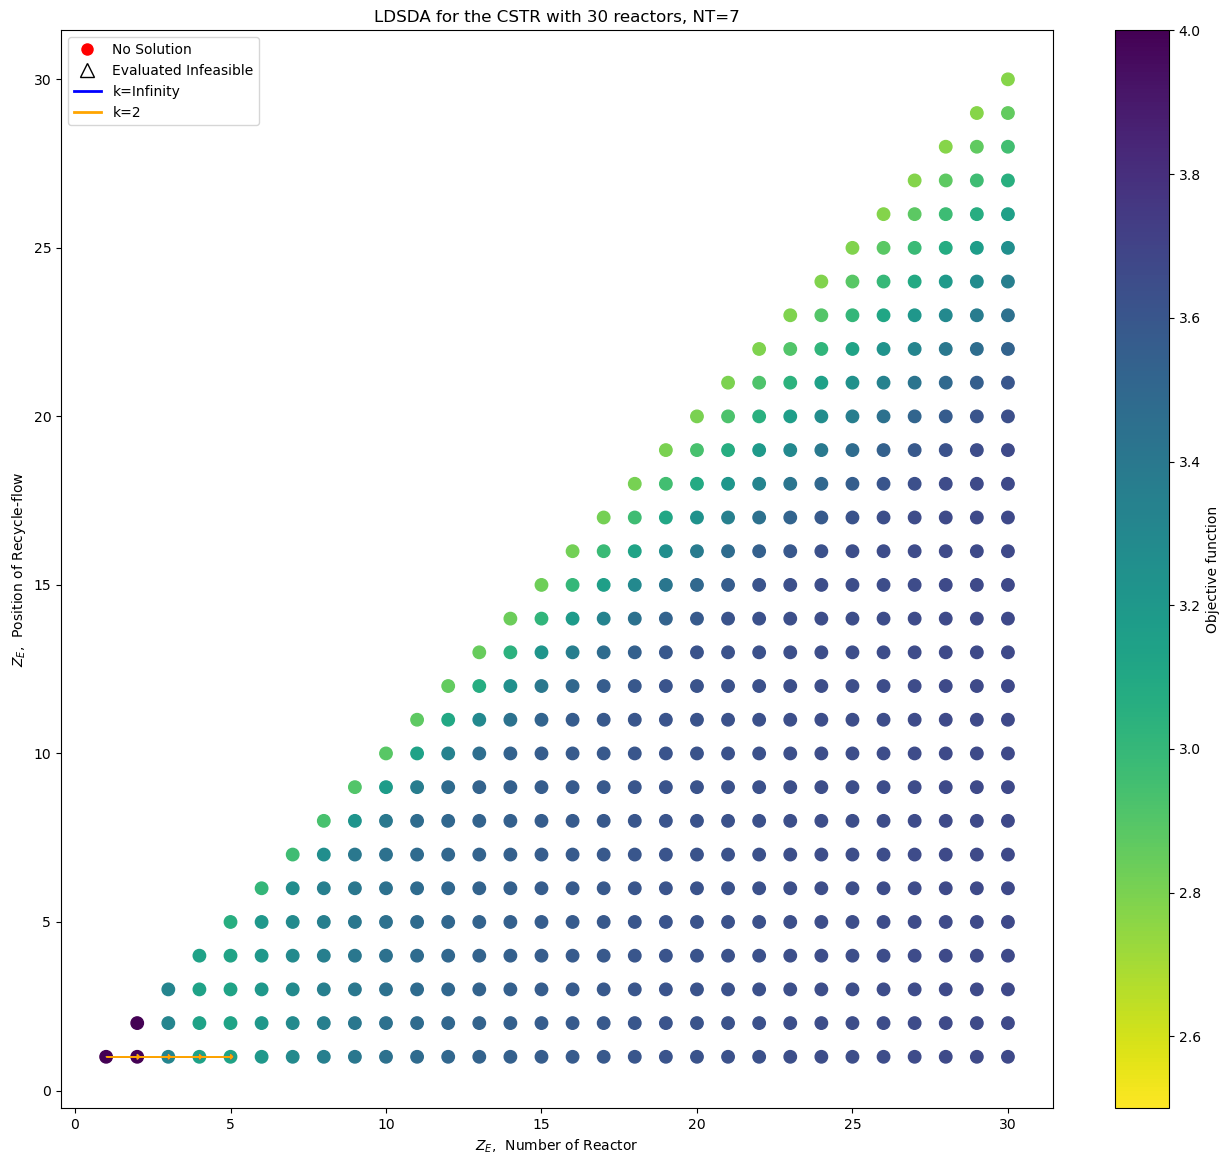

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    cm = plt.colormaps.get_cmap('viridis_r')
    plt.figure(figsize=(16, 14))

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    sc = plt.scatter(feas_x, feas_y, s=80, c=objs, cmap=cm, vmin=2.5, vmax=4)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)

    for route, color in routes_colors:
        for i in range(len(route) - 1):
            plt.arrow(
                route[i][0],
                route[i][1],
                route[i + 1][0] - route[i][0],
                route[i + 1][1] - route[i][1],
                width=0.00005,
                head_width=0.15,
                head_length=0.08,
                color=color,
            )

    plt.title('LDSDA for the CSTR with 30 reactors, NT=7')

    # Using LaTeX for subscript only for 'E' in the axis labels
    plt.xlabel('$Z_E$, ' + ext1_name.split('Z_E,')[1] if 'Z_E,' in ext1_name else ext1_name)
    plt.ylabel('$Z_E$, ' + ext2_name.split('Z_E,')[1] if 'Z_E,' in ext2_name else ext2_name)
    
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No Solution'),
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='none', markeredgecolor='black', markersize=10, label='Evaluated Infeasible'),
        plt.Line2D([0], [0], color='blue', lw=2, label='k=Infinity'),
        plt.Line2D([0], [0], color='orange', lw=2, label='k=2')
    ]
    plt.legend(handles=legend_elements)
    plt.show()

df = pd.read_csv('compl_enum_cstr_30_baron.csv')

route1 = [(1,1), (2,1), (3,1), (4,1), (5,1)]
route2 = [(1,1), (2,1), (3,1), (4,1), (5,1)]

# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# Visualize both routes on the same graph
routes_colors = [(route1, 'blue'), (route2, 'orange')]
# routes_colors = [(route1, 'blue')]
# routes_colors = [(route2, 'orange')]
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, infeas_x=infeas_x, infeas_y=infeas_y, nan_x=nan_x, nan_y=nan_y, objs=objs, ext1_name='Z_E, Number of Reactor', ext2_name='Z_E, Position of Recycle-flow')

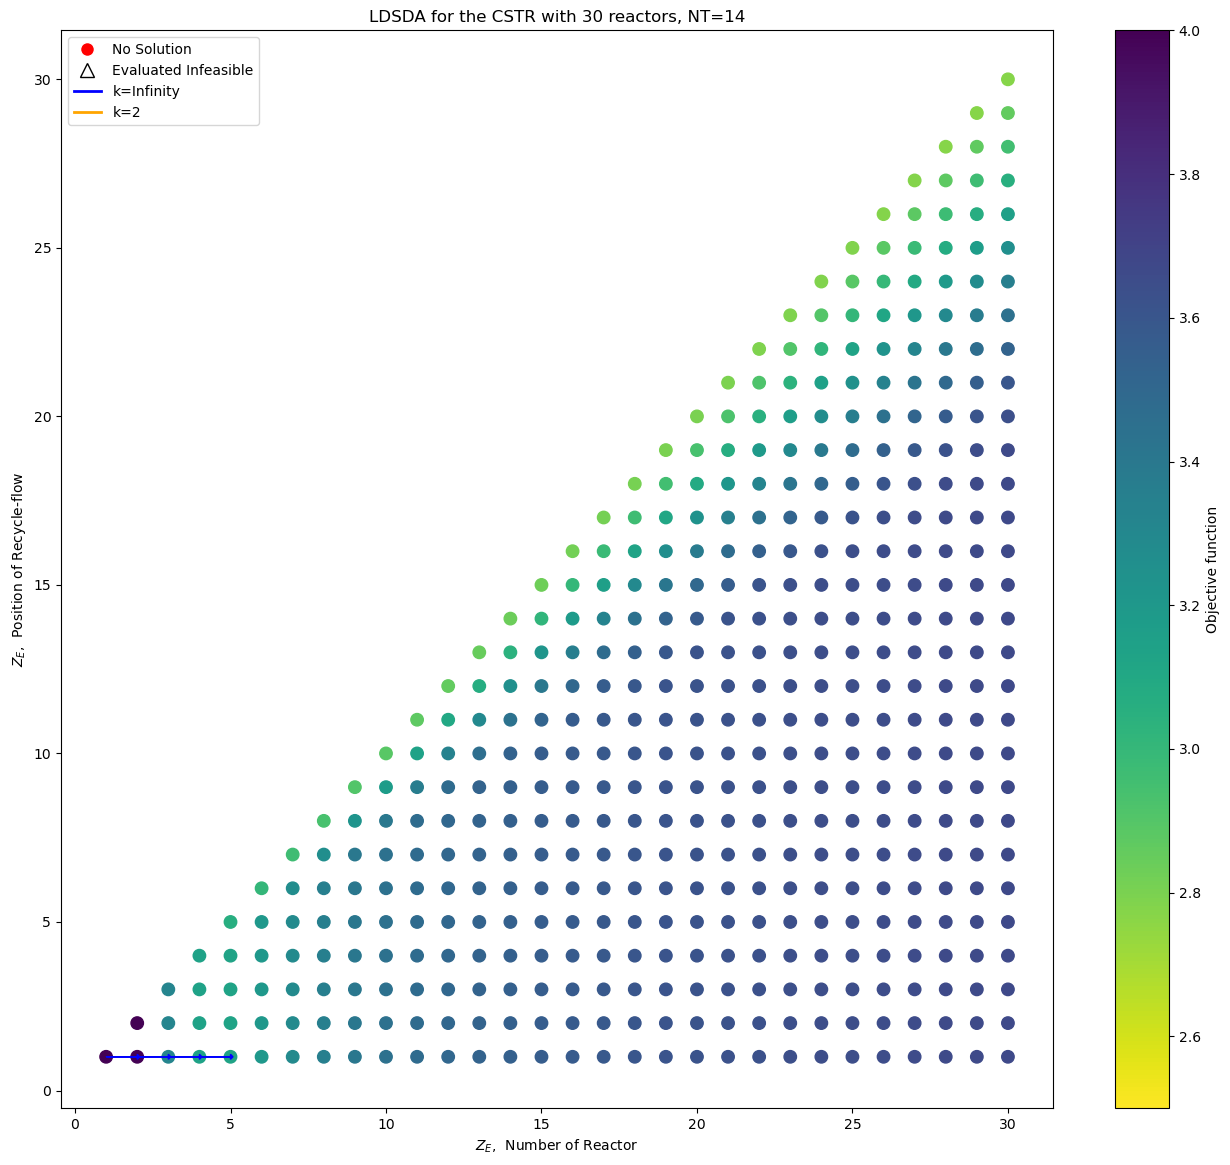

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    cm = plt.colormaps.get_cmap('viridis_r')
    plt.figure(figsize=(16, 14))

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    sc = plt.scatter(feas_x, feas_y, s=80, c=objs, cmap=cm, vmin=2.5, vmax=4)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)

    for route, color in routes_colors:
        for i in range(len(route) - 1):
            plt.arrow(
                route[i][0],
                route[i][1],
                route[i + 1][0] - route[i][0],
                route[i + 1][1] - route[i][1],
                width=0.00005,
                head_width=0.15,
                head_length=0.08,
                color=color,
            )

    plt.title('LDSDA for the CSTR with 30 reactors, NT=14')

    # Using LaTeX for subscript only for 'E' in the axis labels
    plt.xlabel('$Z_E$, ' + ext1_name.split('Z_E,')[1] if 'Z_E,' in ext1_name else ext1_name)
    plt.ylabel('$Z_E$, ' + ext2_name.split('Z_E,')[1] if 'Z_E,' in ext2_name else ext2_name)
    
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No Solution'),
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='none', markeredgecolor='black', markersize=10, label='Evaluated Infeasible'),
        plt.Line2D([0], [0], color='blue', lw=2, label='k=Infinity'),
        plt.Line2D([0], [0], color='orange', lw=2, label='k=2')
    ]
    plt.legend(handles=legend_elements)
    plt.show()

df = pd.read_csv('compl_enum_cstr_30_baron.csv')

route1 = [(1,1), (2,1), (3,1), (4,1), (5,1)] #[(1,1), (2,2), (3,3), (4,4), (5,5), (6,6), (7,7), (8,8), (9,9), (10,10), (11,11), (12,12), (13,13), (14,14)]
route2 = []# [(1,1), (2,1), (3,1), (4,1), (5,1)]

# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# Visualize both routes on the same graph
routes_colors = [(route1, 'blue'), (route2, 'orange')]
# routes_colors = [(route1, 'blue')]
# routes_colors = [(route2, 'orange')]
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, infeas_x=infeas_x, infeas_y=infeas_y, nan_x=nan_x, nan_y=nan_y, objs=objs, ext1_name='Z_E, Number of Reactor', ext2_name='Z_E, Position of Recycle-flow')

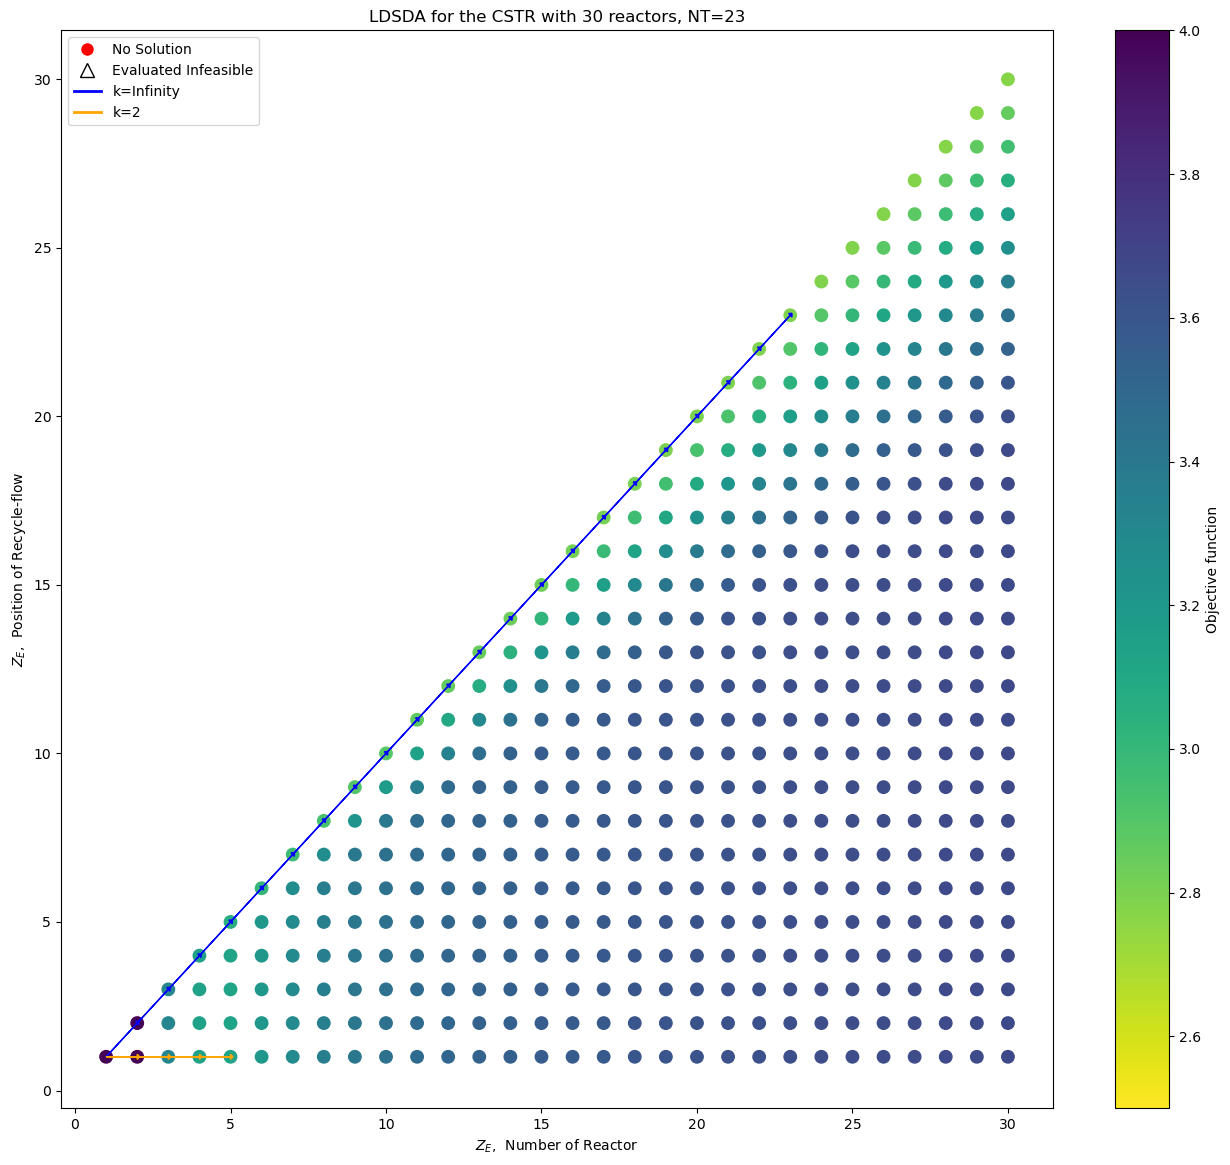

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    cm = plt.colormaps.get_cmap('viridis_r')
    plt.figure(figsize=(16, 14))

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    sc = plt.scatter(feas_x, feas_y, s=80, c=objs, cmap=cm, vmin=2.5, vmax=4)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)

    for route, color in routes_colors:
        for i in range(len(route) - 1):
            plt.arrow(
                route[i][0],
                route[i][1],
                route[i + 1][0] - route[i][0],
                route[i + 1][1] - route[i][1],
                width=0.00005,
                head_width=0.15,
                head_length=0.08,
                color=color,
            )

    plt.title('LDSDA for the CSTR with 30 reactors, NT=23')

    # Using LaTeX for subscript only for 'E' in the axis labels
    plt.xlabel('$Z_E$, ' + ext1_name.split('Z_E,')[1] if 'Z_E,' in ext1_name else ext1_name)
    plt.ylabel('$Z_E$, ' + ext2_name.split('Z_E,')[1] if 'Z_E,' in ext2_name else ext2_name)
    
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No Solution'),
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='none', markeredgecolor='black', markersize=10, label='Evaluated Infeasible'),
        plt.Line2D([0], [0], color='blue', lw=2, label='k=Infinity'),
        plt.Line2D([0], [0], color='orange', lw=2, label='k=2')
    ]
    plt.legend(handles=legend_elements)
    plt.show()

df = pd.read_csv('compl_enum_cstr_30_baron.csv')

route1 = [(1,1), (2,2), (3,3), (4,4), (5,5), (6,6), (7,7), (8,8), (9,9), (10,10), (11,11), (12,12), (13,13), (14,14), (15,15), (16,16), (17,17), (18,18), (19,19), (20,20), (21,21), (22,22), (23,23)]
route2 = [(1,1), (2,1), (3,1), (4,1), (5,1)]

# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# Visualize both routes on the same graph
routes_colors = [(route1, 'blue'), (route2, 'orange')]
# routes_colors = [(route1, 'blue')]
# routes_colors = [(route2, 'orange')]
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, infeas_x=infeas_x, infeas_y=infeas_y, nan_x=nan_x, nan_y=nan_y, objs=objs, ext1_name='Z_E, Number of Reactor', ext2_name='Z_E, Position of Recycle-flow')

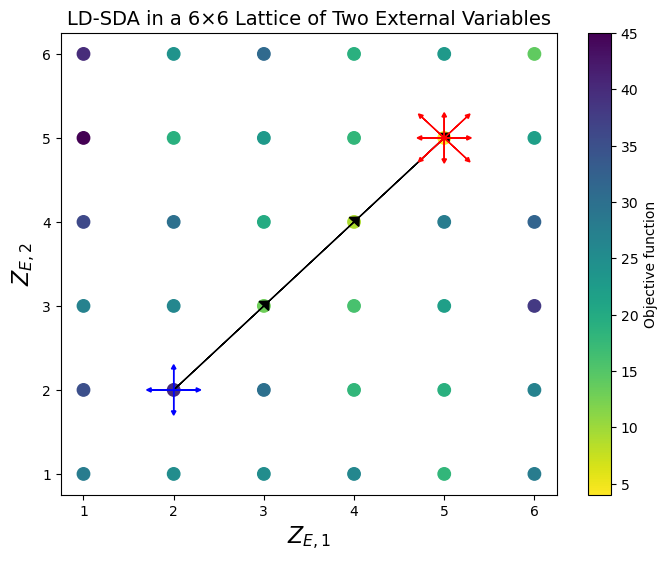

In [82]:
def visualize_dsda(
    routes_colors: list = [],
    feas_x: list = [],
    feas_y: list = [],
    infeas_x: list = [],
    infeas_y: list = [],
    nan_x: list = [],
    nan_y: list = [],
    objs: list = [],
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
     arrow_points_colors: dict = {}
):
    cm = plt.colormaps.get_cmap('viridis_r')
    plt.figure(figsize=(8, 6))

    # Scatter plot for NaN objectives as hollow circles
    plt.scatter(nan_x, nan_y, s=80, facecolors='none', edgecolors='red')

    # Scatter plot for Evaluated_Infeasible points as hollow triangles
    plt.scatter(infeas_x, infeas_y, s=80, marker='^', facecolors='none', edgecolors='black')

    sc = plt.scatter(feas_x, feas_y, s=80, c=objs, cmap=cm)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)

    for route, color in routes_colors:
        for i in range(len(route) - 1):
            plt.arrow(
                route[i][0],
                route[i][1],
                route[i + 1][0] - route[i][0],
                route[i + 1][1] - route[i][1],
                width=0.00005,
                head_width=0.15,
                head_length=0.08,
                color=color,
            )

    # Define all eight directions
    all_directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, 1), (-1, -1), (1, -1)]
    # Define only the four cardinal directions
    cardinal_directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    for point, color in arrow_points_colors.items():
        directions = cardinal_directions if color == 'blue' else all_directions
        for dx, dy in directions:
            plt.arrow(point[0], point[1], dx * 0.25, dy * 0.25, head_width=0.05, head_length=0.05, fc=color, ec=color)

    plt.title('LD-SDA in a 6×6 Lattice of Two External Variables', fontsize=14)

    # Using LaTeX for subscript in axis labels
    plt.xlabel('$Z_{E,1}$' if 'Z_E,1' in ext1_name else ext1_name, fontsize=16)
    plt.ylabel('$Z_{E,2}$' if 'Z_E,2' in ext2_name else ext2_name, fontsize=16)

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No Solution'),
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='none', markeredgecolor='black', markersize=10, label='Evaluated Infeasible'),
        plt.Line2D([0], [0], color='blue', lw=2, label='k=Infinity'),
        plt.Line2D([0], [0], color='orange', lw=2, label='k=2')
    ]
    plt.show()

df = pd.read_csv('LDSDA.csv')

route1 = [(2,2), (3,3), (4,4), (5,5)]
route2 = []
arrow_points_colors = {(2, 2): 'blue', (5, 5): 'red'}

# Filter points based on their status
optimal_df = df[df['Status'] == 'Optimal']
infeasible_df = df[df['Status'] == 'Evaluated_Infeasible']

# Extract x, y coordinates and objective values for optimal points
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].tolist()  # Replacing NaN with 0 for plotting purposes

# Extract x, y coordinates for infeasible points
infeas_x = infeasible_df['x'].tolist()
infeas_y = infeasible_df['y'].tolist()

# Identify points with NaN objectives within the optimal dataset
nan_obj_indices = optimal_df['Objective'].index[optimal_df['Objective'].isna()].tolist()
nan_x = optimal_df['x'][nan_obj_indices].tolist()
nan_y = optimal_df['y'][nan_obj_indices].tolist()

# Visualize both routes on the same graph
routes_colors = [(route1, 'black'), (route2, 'orange')]
# routes_colors = [(route1, 'blue')]
# routes_colors = [(route2, 'orange')]
visualize_dsda(routes_colors=routes_colors, feas_x=feas_x, feas_y=feas_y, infeas_x=infeas_x, infeas_y=infeas_y, nan_x=nan_x, nan_y=nan_y, objs=objs, ext1_name='Z_E,1', ext2_name='Z_E,2', arrow_points_colors=arrow_points_colors)